# Introduction


Ocular Disease Recognition dataset

* Normal (N);  
* Diabetes (D);  
* Glaucoma (G);  
* Cataract (C);  
* AMD (A);  
* Hypertension (H);  
* Myopia (M);
* Other diseases/abnormalities (O)  


This project focuses on Cataract.


# Data Preprocessing

In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
IMG_SIZE = 224
BATCH_SIZE = 32
NO_EPOCHS = 50
NUM_CLASSES = 2
DATA_FOLDER = "/content/drive/MyDrive/Ocular Disease Recognition/ODIR-5K/Training Images"
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import cv2 as cv
from random import shuffle
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
# import tensorflow_addons as tfa
import tensorflow as tf
%matplotlib inline

In [3]:
data_df = pd.read_excel(open("/content/drive/MyDrive/Ocular Disease Recognition/ODIR-5K/data.xlsx", 'rb'), sheet_name='Sheet1')

In [4]:
data_df.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", "right_diagnosys", "normal",
                  "diabetes", "glaucoma", "cataract", "amd", "hypertension", "myopia", "other"]

In [5]:
data_df

,id,age,sex,left_fundus,right_fundus,left_diagnosys,right_diagnosys,normal,diabetes,glaucoma,cataract,amd,hypertension,myopia,other
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [6]:
path = '/content/drive/MyDrive/Ocular Disease Recognition/preprocessed_images/'

In [7]:
data_df['left_fundus'][0]

'0_left.jpg'

In [8]:
path+data_df['left_fundus'][0]

'/content/drive/MyDrive/Ocular Disease Recognition/preprocessed_images/0_left.jpg'

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

img = tf.keras.preprocessing.image.load_img(path+data_df['left_fundus'][0])
img_array = tf.keras.preprocessing.image.img_to_array(img)

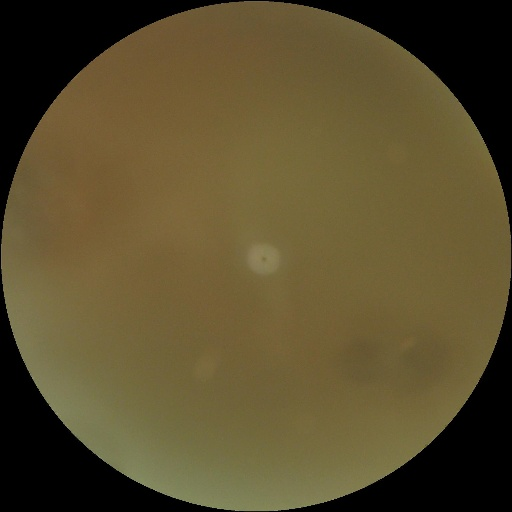

In [10]:
img

## Reference Paper: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10166032

2. https://www.sciencedirect.com/science/article/pii/S1746809420304432

## inceptv3

In [11]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import tensorflow as tf

# path = '/content/drive/MyDrive/Ocular Disease Recognition/preprocessed_images/'
# metadata_df = data_df

# def load_and_organize_data(image_path, metadata_df):
#     image_data = []
#     labels = []

#     for index, row in metadata_df.iterrows():
#         left_image_path = os.path.join(image_path, row['left_fundus'])
#         right_image_path = os.path.join(image_path, row['right_fundus'])

#         if os.path.exists(left_image_path) and os.path.exists(right_image_path):
#             # Load and preprocess left and right fundus images
#             left_img = tf.keras.preprocessing.image.load_img(left_image_path, target_size=(224, 224))
#             right_img = tf.keras.preprocessing.image.load_img(right_image_path, target_size=(224, 224))

#             left_img_array = tf.keras.preprocessing.image.img_to_array(left_img) / 255.0
#             right_img_array = tf.keras.preprocessing.image.img_to_array(right_img) / 255.0

#             # Combine the images (average)
#             combined_image = (left_img_array + right_img_array) / 2

#             image_data.append(combined_image)

#             # Collect labels for multi-label classification
#             labels.append([row['normal'], row['diabetes'], row['glaucoma'], row['cataract'],
#                            row['amd'], row['hypertension'], row['myopia'], row['other']])

#     image_data = np.array(image_data)
#     labels = np.array(labels)

#     return image_data, labels


In [12]:
import cv2

def process_row_opencv(row, image_path):
    left_image_path = os.path.join(image_path, row['left_fundus'])
    right_image_path = os.path.join(image_path, row['right_fundus'])

    if os.path.exists(left_image_path) and os.path.exists(right_image_path):
        try:
            # Load images with OpenCV (BGR format)
            left_img = cv2.imread(left_image_path)
            right_img = cv2.imread(right_image_path)

            if left_img is None or right_img is None:
                print(f"Failed to read images for row {row.name}")
                return None

            # Resize images
            left_img = cv2.resize(left_img, (224, 224))
            right_img = cv2.resize(right_img, (224, 224))

            # Convert BGR to RGB
            left_img = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)
            right_img = cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB)

            # Normalize
            left_img_array = left_img.astype('float32') / 255.0
            right_img_array = right_img.astype('float32') / 255.0

            # Combine the images (average)
            combined_image = (left_img_array + right_img_array) / 2

            # Collect labels
            labels = [row['normal'], row['glaucoma'], row['cataract'],
                       row['hypertension'], row['myopia']]

            return combined_image, labels
        except Exception as e:
            print(f"Error processing row {row.name}: {e}")
            return None
    else:
        print(f"Images not found for row {row.name}: {left_image_path}, {right_image_path}")
        return None
def load_and_organize_data_parallel_opencv(image_path, metadata_df, num_workers=8):
    # Filter rows where both images exist
    valid_df = metadata_df[
        metadata_df.apply(lambda row: os.path.exists(os.path.join(image_path, row['left_fundus'])) and
                                     os.path.exists(os.path.join(image_path, row['right_fundus'])), axis=1)
    ]

    print(f"Number of valid image pairs: {len(valid_df)}")

    with Pool(num_workers) as pool:
        func = partial(process_row_opencv, image_path=image_path)
        results = pool.map(func, [row for _, row in valid_df.iterrows()])

    # Filter out None results
    results = [res for res in results if res is not None]

    if results:
        image_data, labels = zip(*results)
        return np.array(image_data), np.array(labels)
    else:
        return np.array([]), np.array([])


In [13]:
from multiprocessing import Pool  # Add this import
from functools import partial  # If you are using partial functions
import pandas as pd  # Assuming you are working with DataFrames

image_data, labels = load_and_organize_data_parallel_opencv(path, data_df)
print(f"Image data shape: {image_data.shape}")
print(f"Labels shape: {labels.shape}")


Number of valid image pairs: 3034
Image data shape: (3034, 224, 224, 3)
Labels shape: (3034, 5)


In [ ]:
# image_data, labels = load_and_organize_data(path, data_df)

# image_data, labels = load_and_organize_data_parallel(image_path, data_df.iloc[:100,:])

In [14]:
image_data.shape

(3034, 224, 224, 3)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)



In [16]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf



base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
output_layer = Dense(labels.shape[1], activation='sigmoid')(x)  # Multi-label classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=output_layer)

# Freeze the base model layers (transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define training parameters
batch_size = 32
epochs = 50

# Fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 340ms/step - accuracy: 0.6701 - loss: 0.3434 - val_accuracy: 0.8451 - val_loss: 0.2471
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8027 - loss: 0.2467 - val_accuracy: 0.8534 - val_loss: 0.2284
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8226 - loss: 0.2325 - val_accuracy: 0.8501 - val_loss: 0.2222
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8228 - loss: 0.2183 - val_accuracy: 0.8550 - val_loss: 0.2205
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8503 - loss: 0.2074 - val_accuracy: 0.8402 - val_loss: 0.2217
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8340 - loss: 0.2064 - val_accuracy: 0.8418 - val_loss: 0.2157
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8343 - loss: 0.2067 - val_accuracy: 0.8369 - val_loss: 0.2178
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accur

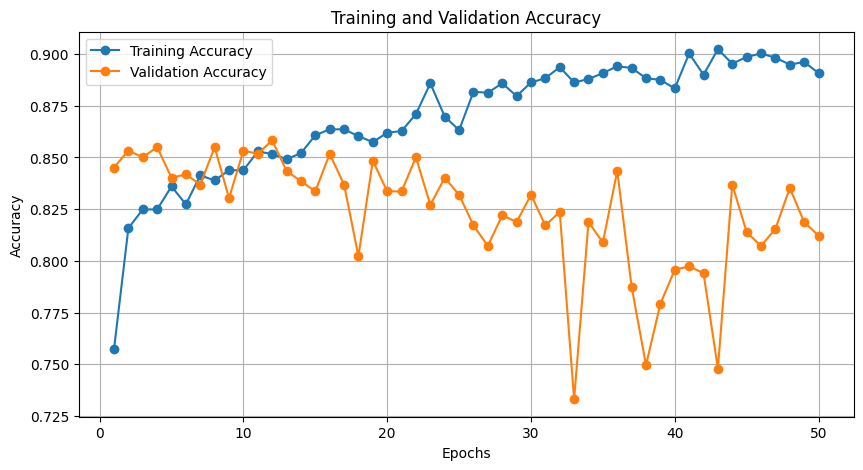

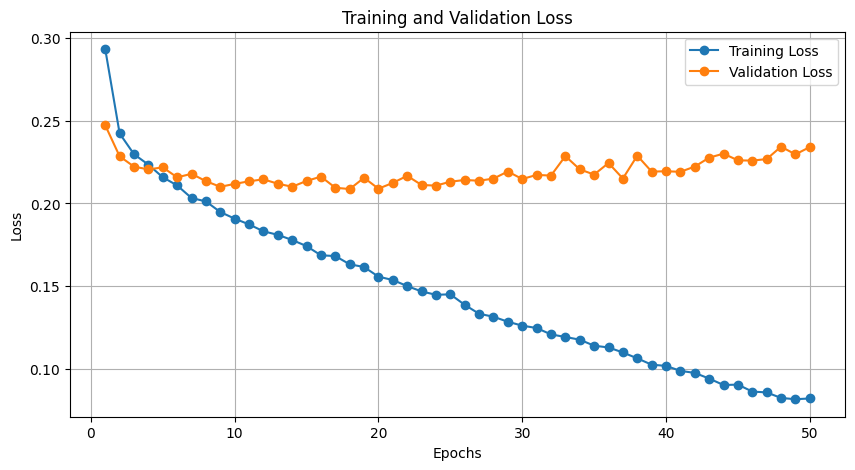

In [18]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy and loss from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Ocular Disease Recognition/inceptionv3_training_validation_plot.png')
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Ocular Disease Recognition/inceptionv3_training_loss_plot.png')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Get predictions
y_pred = model.predict(X_test, batch_size=batch_size)

# Convert predictions to binary (apply threshold of 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1-score for each label
precision = precision_score(y_test, y_pred_binary, average=None)
recall = recall_score(y_test, y_pred_binary, average=None)
f1 = f1_score(y_test, y_pred_binary, average=None)

print("Precision for each label:", precision)
print("Recall for each label:", recall)
print("F1-score for each label:", f1)

# Calculate overall precision, recall, and F1-score (macro-average)
macro_precision = precision_score(y_test, y_pred_binary, average='macro')
macro_recall = recall_score(y_test, y_pred_binary, average='macro')
macro_f1 = f1_score(y_test, y_pred_binary, average='macro')

print(f"Macro-Precision: {macro_precision}")
print(f"Macro-Recall: {macro_recall}")
print(f"Macro-F1 Score: {macro_f1}")

# Full classification report
report = classification_report(y_test, y_pred_binary, target_names=['normal', 'glaucoma', 'cataract', 'hypertension', 'myopia'])
print("\nClassification Report:\n", report)



19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8230 - loss: 0.2119
Test Loss: 0.22936294972896576, Test Accuracy: 0.8023064136505127
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step
Precision for each label: [0.44329897 0.46153846 0.78378378 0.33333333 0.89285714]
Recall for each label: [0.43654822 0.18181818 0.69047619 0.04166667 0.83333333]
F1-score for each label: [0.4398977  0.26086957 0.73417722 0.07407407 0.86206897]
Macro-Precision: 0.5829623381169773
Macro-Recall: 0.4367685191289253
Macro-F1 Score: 0.4742175036416597

Classification Report:
               precision    recall  f1-score   support

      normal       0.44      0.44      0.44       197
    glaucoma       0.46      0.18      0.26        33
    cataract       0.78      0.69      0.73        42
hypertension       0.33      0.04      0.07        24
      myopia       0.89      0.83      0.86        30

   micro avg       0.53      0.45      0.49       326
   macro avg       0.58      0.44      0.47       326
weighted av

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.save('/content/drive/MyDrive/Ocular Disease Recognition/inceptionV3_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Save the model to an HDF5 file for compatibility with Streamlit
model.save('/content/drive/MyDrive/Ocular Disease Recognition/inceptionv3_multilabel_model.h5')


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 28,112,689 (107.24 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 4,206,604 (16.05 MB)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input

def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model to map the input to the activations and output
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Forward pass through the grad model
        last_conv_layer_output, preds = grad_model(img_array)

        if pred_index is None:
            pred_index = tf.argmax(preds[0])  # Use the predicted class by default

        class_channel = preds[:, pred_index]

    # Compute the gradients of the target class w.r.t. the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradients across the channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the channels of the feature map by the gradients
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.reduce_sum(last_conv_layer_output * pooled_grads, axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam_grid(directory_path, model, last_conv_layer_name='mixed10', class_labels=None):
    # Get all image paths from the directory
    all_images = [os.path.join(directory_path, fname) for fname in os.listdir(directory_path) if fname.endswith(('.jpg', '.jpeg', '.png'))]

    if len(all_images) < 100:
        raise ValueError("Not enough images in the directory to sample 9 for the grid.")

    image_paths = random.sample(all_images, 100)
    plt.figure(figsize=(25, 25))

    for i, img_path in enumerate(image_paths):
        img_name = os.path.basename(img_path)

        # Load and preprocess the image
        img = load_img(img_path, target_size=(224, 224))
        img_array = np.expand_dims(img_to_array(img), axis=0)
        img_array = preprocess_input(img_array)

        # Generate Grad-CAM heatmap
        heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name)

        # Predict the class
        preds = model.predict(img_array)
        pred_class = class_labels[np.argmax(preds[0])] if class_labels else f"Class {np.argmax(preds[0])}"

        # Load original image for overlay
        original_img = cv2.imread(img_path)
        original_img = cv2.resize(original_img, (224, 224))

        # Resize and apply heatmap
        heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
        heatmap_resized = np.uint8(255 * heatmap_resized)
        heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

        # Superimpose the heatmap on the original image
        superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap_colored, 0.4, 0)

        # Display the Grad-CAM result
        plt.subplot(10, 10, i + 1)
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        plt.title(f"{img_name}\nPred: {pred_class}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



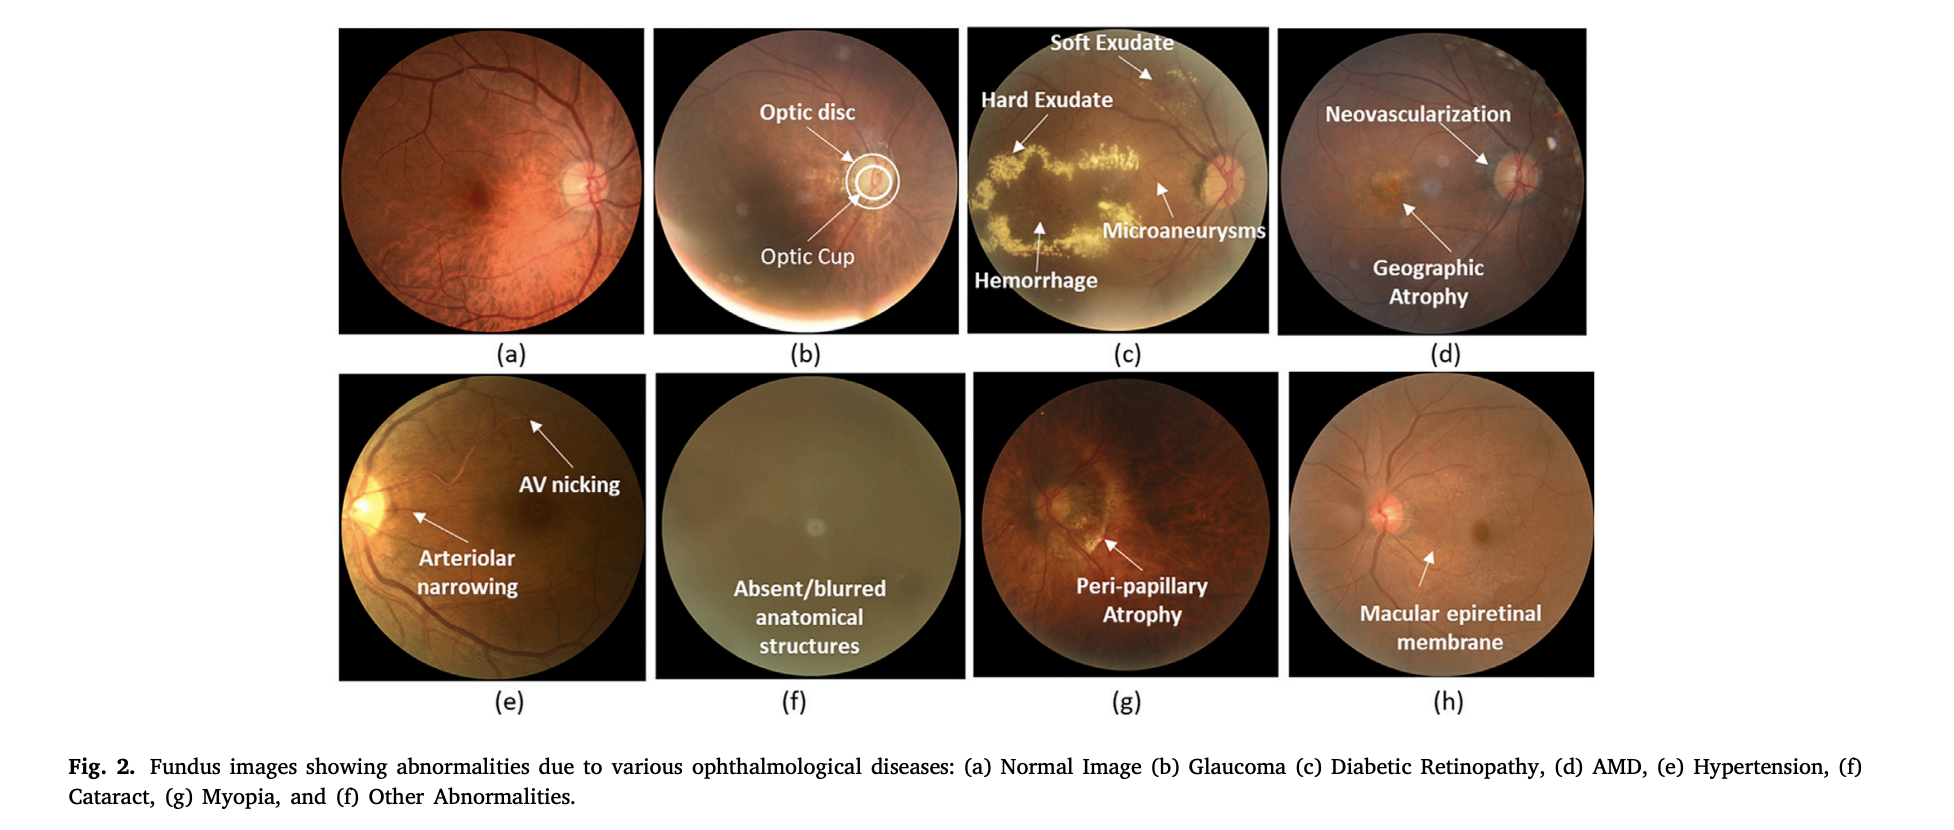

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Specify the path to your image
image_path = '/content/drive/MyDrive/Ocular Disease Recognition/SampleImage.png'

# Read and display the image
image = cv2.imread(image_path)
cv2_imshow(image)


In [ ]:
class_labels = ["normal", "glaucoma", "cataract","hypertension", "myopia"]
display_gradcam_grid(path, model, last_conv_layer_name='mixed10', class_labels=class_labels)


Output hidden; open in https://colab.research.google.com to view.

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


<ipython-input-22-05698e82790a>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


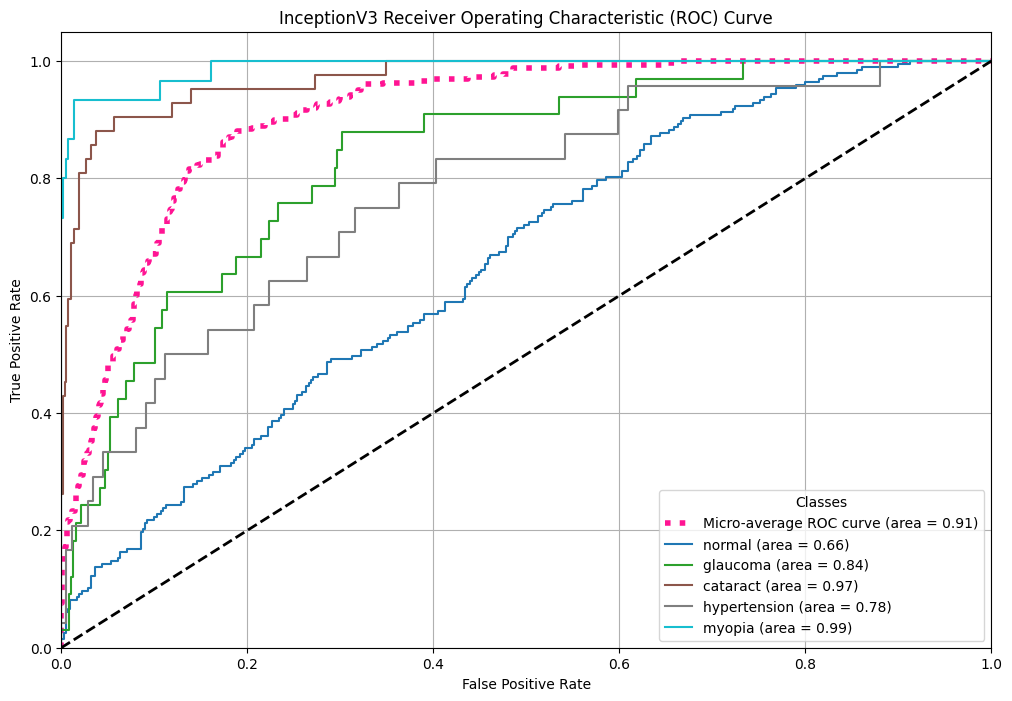

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Class names for labels
class_names = ['normal', 'glaucoma', 'cataract',
               'hypertension', 'myopia']

# Predict probabilities for the test set
y_pred = model.predict(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = plt.cm.get_cmap("tab10", n_classes)
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'{class_name} (area = {roc_auc[i]:.2f})')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('InceptionV3 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right", title="Classes")
plt.grid()
plt.savefig('/content/drive/MyDrive/Ocular Disease Recognition/inceptionv3_roc_curve.png')
plt.show()


## Resnet 50

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.10,
    zoom_range=0.10,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()  # No augmentation for validation

# Create data generators
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)

validation_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=32,
    shuffle=False
)

# Load the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(labels.shape[1], activation='sigmoid')(x)  # Multi-label classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=output_layer)

# Freeze the base model layers (transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('resnet50_best_model.keras',  # Changed extension here
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)


# Define training parameters
batch_size = 32
epochs = 20

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=len(X_test) // batch_size)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5874 - loss: 0.5458
Epoch 1: val_loss improved from inf to 0.32674, saving model to resnet50_best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 432ms/step - accuracy: 0.5887 - loss: 0.5444 - val_accuracy: 0.7951 - val_loss: 0.3267 - learning_rate: 1.0000e-04
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7500 - loss: 0.3425

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.32674
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7500 - loss: 0.3425 - val_accuracy: 0.7419 - val_loss: 0.3287 - learning_rate: 1.0000e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.7867 - loss: 0.3030
Epoch 3: val_loss improved from 0.32674 to 0.29645, saving model to resnet50_best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 301ms/step - accuracy: 0.7868 - loss: 0.3029 - val_accuracy: 0.7951 - val_loss: 0.2965 - learning_rate: 1.0000e-04
Epoch 4/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8125 - loss: 0.2962
Epoch 4: val_loss did not improve from 0.29645
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.2962 - val_accuracy: 0.7419 - val_loss: 0.3061 - learning_rate: 1.0000e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7889 - loss: 0.2955
Epoch 5: val_loss did not improve from 0.29645
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 300ms/step - accuracy: 0.7889 - loss: 0.295

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


<ipython-input-25-bf90fcdf1335>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


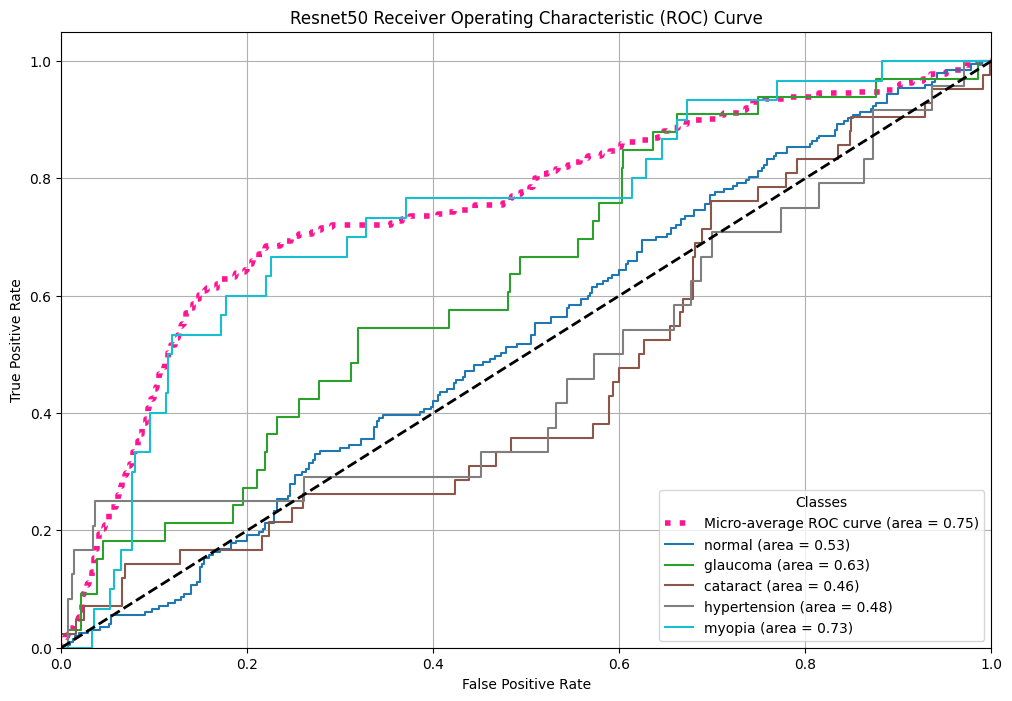

In [ ]:
# Class names for labels
class_names = ['normal', 'glaucoma', 'cataract',
               'hypertension', 'myopia']

# Predict probabilities for the test set
y_pred = model.predict(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = plt.cm.get_cmap("tab10", n_classes)
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'{class_name} (area = {roc_auc[i]:.2f})')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Resnet50 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right", title="Classes")
plt.grid()
plt.savefig('/content/drive/MyDrive/Ocular Disease Recognition/resnet50_roc_curve.png')
plt.show()


## Efficiency Net

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Split the data (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()  # No augmentation for validation

# Create data generators
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)

validation_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=32,
    shuffle=False
)

# Load the EfficientNetB7 base model
base_model = EfficientNetB7(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(y_train.shape[1], activation='sigmoid')(x)  # Multi-label classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=output_layer)

# Freeze the base model layers (transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    'efficientnetb7_best_model.keras',  # Use .keras extension
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Define training parameters
batch_size = 32
epochs = 20

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Evaluate the model
loss, accuracy = model.evaluate(
    validation_generator,
    steps=len(X_test) // batch_size
)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Optional: Fine-Tuning
# Unfreeze some layers in the base model
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define Fine-Tuning Callbacks
checkpoint_ft = ModelCheckpoint(
    'efficientnetb7_finetuned_best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Continue Training (Fine-Tuning)
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    epochs=10,  # Additional epochs for fine-tuning
    callbacks=[early_stop, reduce_lr, checkpoint_ft]
)

# Evaluate the fine-tuned model
loss_ft, accuracy_ft = model.evaluate(
    validation_generator,
    steps=len(X_test) // batch_size
)
print(f"Fine-Tuned Test Loss: {loss_ft}, Fine-Tuned Test Accuracy: {accuracy_ft}")


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.5422 - loss: 0.4932
Epoch 1: val_loss improved from inf to 0.57944, saving model to efficientnetb7_best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.5431 - loss: 0.4923 - val_accuracy: 0.7951 - val_loss: 0.5794 - learning_rate: 1.0000e-04
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - accuracy: 0.7188 - loss: 0.2820

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.57944 to 0.57790, saving model to efficientnetb7_best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - accuracy: 0.7188 - loss: 0.2820 - val_accuracy: 0.7419 - val_loss: 0.5779 - learning_rate: 1.0000e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.6635 - loss: 0.3704
Epoch 3: val_loss improved from 0.57790 to 0.57615, saving model to efficientnetb7_best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 379ms/step - accuracy: 0.6636 - loss: 0.3704 - val_accuracy: 0.7951 - val_loss: 0.5762 - learning_rate: 1.0000e-04
Epoch 4/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - accuracy: 0.6562 - loss: 0.3665
Epoch 4: val_loss did not improve from 0.57615
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6562 - loss: 0.3665 - val_accuracy: 0.7419 - val_loss: 0.5773 - learning_rate: 1.0000e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6579 - loss: 0.3597
Epoch 5: val_loss did not improve from 0.57615
75/75 ━━━━━

19/19 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step


<ipython-input-27-e309dc75ac93>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


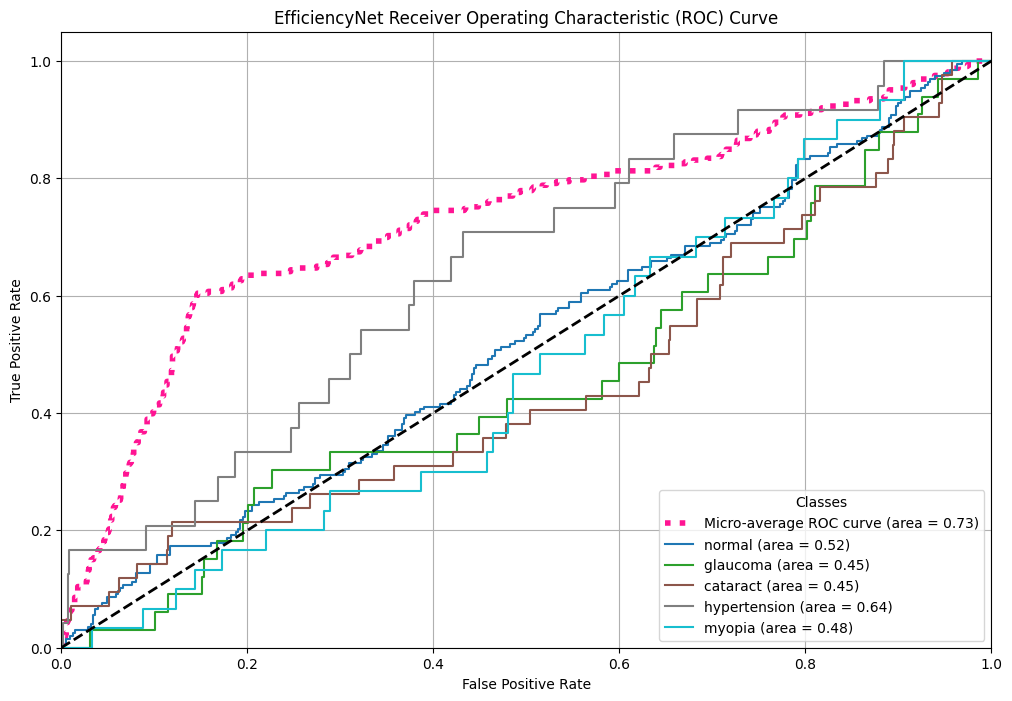

In [ ]:
# Class names for labels
class_names = ['normal', 'glaucoma', 'cataract',
               'hypertension', 'myopia']

# Predict probabilities for the test set
y_pred = model.predict(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = plt.cm.get_cmap("tab10", n_classes)
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'{class_name} (area = {roc_auc[i]:.2f})')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EfficiencyNet Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right", title="Classes")
plt.grid()
plt.savefig('/content/drive/MyDrive/Ocular Disease Recognition/EfficiencyNet_roc_curve.png')
plt.show()


## DenseNet

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Split the data (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.10,
    zoom_range=0.10,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()  # No augmentation for validation

# Create data generators
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)

validation_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=32,
    shuffle=False
)

# Load the DenseNet121 base model (or DenseNet169)
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(y_train.shape[1], activation='sigmoid')(x)  # Multi-label classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=output_layer)

# Freeze the base model layers (transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    'densenet121_best_model.keras',  # Use .keras extension
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Define training parameters
batch_size = 32
epochs = 100

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Evaluate the model
loss, accuracy = model.evaluate(
    validation_generator,
    steps=len(X_test) // batch_size
)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Optional: Fine-Tuning
# Unfreeze some layers in the base model
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define Fine-Tuning Callbacks
checkpoint_ft = ModelCheckpoint(
    'densenet121_finetuned_best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Continue Training (Fine-Tuning)
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    epochs=10,  # Additional epochs for fine-tuning
    callbacks=[early_stop, reduce_lr, checkpoint_ft]
)

# Evaluate the fine-tuned model
loss_ft, accuracy_ft = model.evaluate(
    validation_generator,
    steps=len(X_test) // batch_size
)
print(f"Fine-Tuned Test Loss: {loss_ft}, Fine-Tuned Test Accuracy: {accuracy_ft}")


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.5651 - loss: 0.5685
Epoch 1: val_loss improved from inf to 0.30721, saving model to densenet121_best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 70s 568ms/step - accuracy: 0.5658 - loss: 0.5669 - val_accuracy: 0.8403 - val_loss: 0.3072 - learning_rate: 1.0000e-04
Epoch 2/100
 1/75 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7500 - loss: 0.2982

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.30721
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7500 - loss: 0.2982 - val_accuracy: 0.7742 - val_loss: 0.3306 - learning_rate: 1.0000e-04
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7556 - loss: 0.2703
Epoch 3: val_loss improved from 0.30721 to 0.24750, saving model to densenet121_best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 312ms/step - accuracy: 0.7558 - loss: 0.2702 - val_accuracy: 0.8559 - val_loss: 0.2475 - learning_rate: 1.0000e-04
Epoch 4/100
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.7812 - loss: 0.2509
Epoch 4: val_loss did not improve from 0.24750
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.2509 - val_accuracy: 0.7742 - val_loss: 0.2712 - learning_rate: 1.0000e-04
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.7910 - loss: 0.2466
Epoch 5: val_loss improved from 0.24750 to 0.22579, saving model to densenet121_best_model.keras
75/75 ━━━━━━━━━━

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
class_names = ['normal', 'glaucoma', 'cataract',
               'hypertension', 'myopia']


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


<ipython-input-24-0b696c8a5143>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


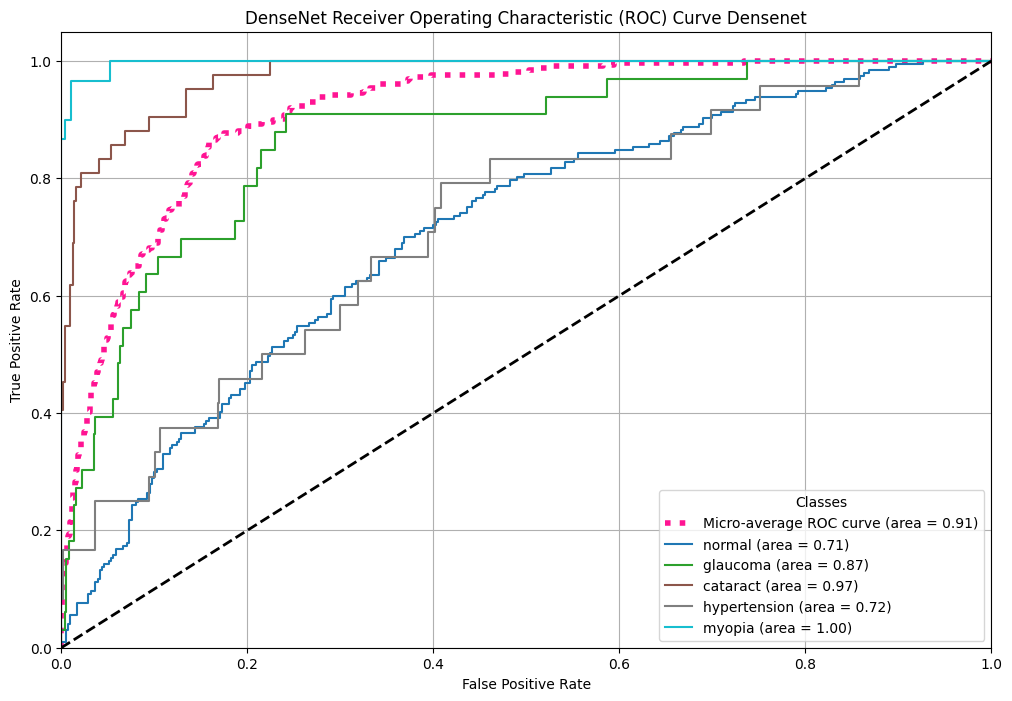

In [ ]:
# Predict probabilities for the test set
y_pred = model.predict(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = plt.cm.get_cmap("tab10", n_classes)
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'{class_name} (area = {roc_auc[i]:.2f})')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DenseNet Receiver Operating Characteristic (ROC) Curve Densenet')
plt.legend(loc="lower right", title="Classes")
plt.grid()
plt.savefig('/content/drive/MyDrive/Ocular Disease Recognition/DenseNet_roc_curve.png')
plt.show()


In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)

# Get the number of layers
num_layers = len(model.layers)

# Get the number of parameters
total_params = model.count_params()

# Get trainable and non-trainable parameters
trainable_params = sum([tf.size(var).numpy() for var in model.trainable_weights])
non_trainable_params = sum([tf.size(var).numpy() for var in model.non_trainable_weights])

print(f"Number of layers: {num_layers}")
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")
print(f"Non-trainable parameters: {non_trainable_params}")


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Number of layers: 177
Total parameters: 25636712
Trainable parameters: 25583592
Non-trainable parameters: 53120


In [1]:
from tensorflow.keras.applications import InceptionV3, EfficientNetB7, DenseNet121
import tensorflow as tf

# Function to calculate and print model details
def print_model_details(model_name, model):
    num_layers = len(model.layers)
    total_params = model.count_params()
    trainable_params = sum([tf.size(var).numpy() for var in model.trainable_weights])
    non_trainable_params = sum([tf.size(var).numpy() for var in model.non_trainable_weights])

    print(f"Model: {model_name}")
    print(f"Number of layers: {num_layers}")
    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")
    print("-" * 40)

# Models
inception_model = InceptionV3(weights='imagenet', include_top=True)
efficientnet_model = EfficientNetB7(weights='imagenet', include_top=True)
densenet_model = DenseNet121(weights='imagenet', include_top=True)

# Print details for each model
print_model_details("InceptionV3", inception_model)
print_model_details("EfficientNetB7", efficientnet_model)
print_model_details("DenseNet121", densenet_model)


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
268326632/268326632 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Model: InceptionV3
Number of layers: 313
Total parameters: 23851784
Trainable parameters: 23817352
Non-trainable parameters: 34432
----------------------------------------
Model: EfficientNetB7
Number of layers: 817
Total parameters: 66658687
Trainable parameters: 66347960
Non-trainable parameters: 310727
----------------------------------------
Model: DenseNet121
Number of layers: 429
Total parameters: 8062504
Trainable parameters: 7978856
Non-trainable parameters: 83648
----------------------------------------


In [2]:
from tensorflow.keras.applications import EfficientNetB7

# Load EfficientNetB7 model
model = EfficientNetB7(weights='imagenet')

# Count layers with trainable parameters
logical_layers = sum(1 for layer in model.layers if layer.count_params() > 0)

print(f"EfficientNetB7 has {logical_layers} logical (parameterized) layers.")


EfficientNetB7 has 438 logical (parameterized) layers.


# Improved Method

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNet, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Path to the directory containing fundus images
image_path = '/content/drive/MyDrive/Ocular Disease Recognition/preprocessed_images/'
image_dir = image_path

# Verify image existence
def verify_image_paths(df, image_dir):
    missing = []
    for idx, row in df.iterrows():
        left_path = os.path.join(image_dir, row['left_fundus'])
        right_path = os.path.join(image_dir, row['right_fundus'])
        if not os.path.exists(left_path):
            missing.append(left_path)
        if not os.path.exists(right_path):
            missing.append(right_path)
    return missing

missing_images = verify_image_paths(data_df, image_path)
if missing_images:
    print(f"Missing Images ({len(missing_images)}):")
    for img in missing_images[:10]:  # Show first 10 missing images
        print(img)
    # Remove rows with missing images
    data_df = data_df[data_df.apply(lambda row: os.path.exists(os.path.join(image_dir, row['left_fundus'])) and os.path.exists(os.path.join(image_dir, row['right_fundus'])), axis=1)]
    print(f"After removing missing images, dataset size: {len(data_df)}")
else:
    print("All images found.")

# Features and Labels
X_left = data_df['left_fundus'].values
X_right = data_df['right_fundus'].values
y = data_df[['normal', 'diabetes', 'glaucoma', 'cataract', 'amd', 'hypertension', 'myopia', 'other']].values

# Analyze Class Distribution
label_columns = ['normal', 'diabetes', 'glaucoma', 'cataract', 'amd', 'hypertension', 'myopia', 'other']
class_counts = data_df[label_columns].sum()
print("\nInitial Class Distribution:")
print(class_counts)

# Identify classes with less than 2 instances
singleton_classes = class_counts[class_counts < 2].index.tolist()
print(f"\nSingleton or Highly Imbalanced Classes: {singleton_classes}")

# Remove these classes from the labels
if singleton_classes:
    print("\nRemoving singleton or highly imbalanced classes from the dataset...")
    # Drop the singleton classes from the labels
    label_columns_filtered = [col for col in label_columns if col not in singleton_classes]
    y_filtered = data_df[label_columns_filtered].values
    print(f"Filtered Label Columns: {label_columns_filtered}")
else:
    print("\nNo singleton or highly imbalanced classes found.")
    y_filtered = data_df[label_columns].values

# Split the data
X_train_left, X_val_left, X_train_right, X_val_right, y_train, y_val = train_test_split(
    X_left, X_right, y_filtered, test_size=0.3, random_state=42
)

print(f"\nTraining samples: {len(X_train_left)}")
print(f"Validation samples: {len(X_val_left)}")



All images found.

Initial Class Distribution:
normal          1021
diabetes        1018
glaucoma         191
cataract         194
amd              156
hypertension     100
myopia           135
other            683
dtype: int64

Singleton or Highly Imbalanced Classes: []

No singleton or highly imbalanced classes found.

Training samples: 2123
Validation samples: 911
